In [2]:
import ROOT as r
import sys
import os

In [139]:
c1 = r.TCanvas("c1", "c1", 800, 600)

hvRuns = {1450:[1966], 1400:[1967], 1350:[1968], 1300:[1969], 1250:[1970], 900:[1971], 
        850:[1972], 800:[1973], 750:[1974], 700:[1975, 1980], 650:[1982, 1983, 1984, 1985], 
        600:[1986, 1987], 550:[1988, 1989], 500:[1990]}

for key in hvRuns.keys():

    inputFile = f'backgroundPanelAnalysis_HV{key}.root'

    tin = r.TFile.Open(inputFile, 'READ')
    hvRuns[key] = tin


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Error in <TList::Clear>: A list is accessing an object (0xc39f550) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xc39dfe0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xc39e440) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xc381340) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xc3825c0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xc383840) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xc383c30) already deleted (list name = TList)
Error in <THashList::Delete>: A list is accessing an object (0xc39f550) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xc39dfe0) already deleted (list nam

In [140]:
r.gStyle.SetOptStat(0)

h650Front = hvRuns[650].Get('h_frontPanelArea')
h650Front.SetLineColor(r.kBlack)
h600Front = hvRuns[600].Get('h_frontPanelArea')
h600Front.SetLineColor(r.kBlue)
h550Front = hvRuns[550].Get('h_frontPanelArea')
h550Front.SetLineColor(r.kRed)
h500Front = hvRuns[500].Get('h_frontPanelArea')
h500Front.SetLineColor(r.kGreen)

binning = 4

h650Front.Rebin(binning)
h600Front.Rebin(binning)
h550Front.Rebin(binning)
h500Front.Rebin(binning)

 FCN=2.15151 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=2.45336e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.21375e+00   1.71326e+00   1.56768e-03   1.60555e-05
   2  Mean         5.80057e+04   1.14852e+03   1.24299e+00   1.41256e-09
   3  Sigma        4.28657e+03   8.22952e+02   5.86102e-05  -4.39396e-04
                               ERR DEF= 0.5
 FCN=1.91619 FROM MIGRAD    STATUS=CONVERGED     101 CALLS         102 TOTAL
                     EDM=6.61093e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.19892e+00   1.00880e+00   7.72940e-04  -1.47500e-04
   2  Mean         3.71335e+04   5.36939e+03   3.35487e+00  -3

Error in <TList::Clear>: A list is accessing an object (0x9ec22b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8f50be0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9edbe30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8f3fab0) already deleted (list name = TList)


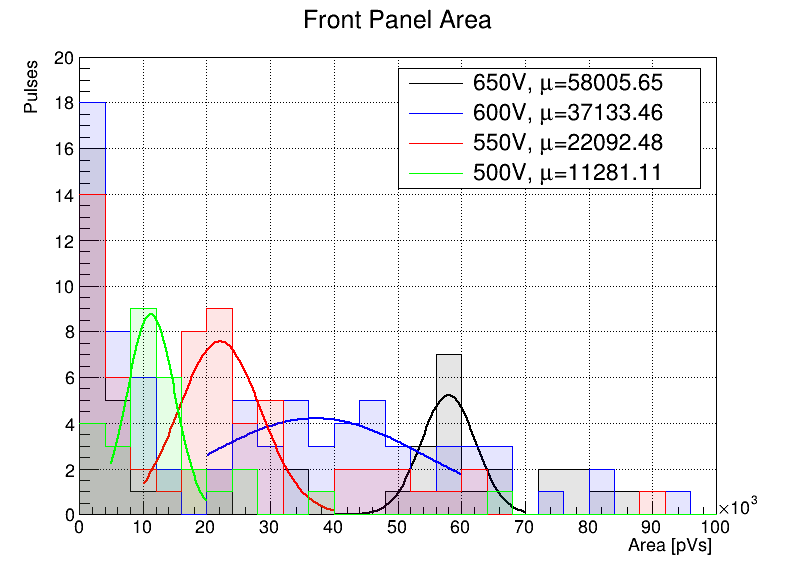

In [156]:
f650 = r.TF1('f650', 'gaus', 40e3, 80e3)
f600 = r.TF1('f600', 'gaus', 20e3, 70e3)
f550 = r.TF1('f550', 'gaus', 10e3, 40e3)
f500 = r.TF1('f500', 'gaus', 0, 20e3)

f650.SetLineColor(r.kBlack)
h650Front.SetFillColorAlpha(r.kBlack, 0.1)
#f650.SetFillStyle(1)
f600.SetLineColor(r.kBlue)
h600Front.SetFillColorAlpha(r.kBlue, 0.1)
#f600.SetFillStyle(1)
f550.SetLineColor(r.kRed)
h550Front.SetFillColorAlpha(r.kRed, 0.1)
#f550.SetFillStyle(1)
f500.SetLineColor(r.kGreen)
h500Front.SetFillColorAlpha(r.kGreen, 0.1)
#f500.SetFillStyle(1)


h650Front.Fit(f650, "LL", "", 40e3, 70e3)
h600Front.Fit(f600, "LL", "", 20e3, 60e3)
h550Front.Fit(f550, "LL", "", 10e3, 40e3)
h500Front.Fit(f500, "LL", "", 5e3, 20e3)

mean650 = round(f650.GetParameter(1), 2)
mean600 = round(f600.GetParameter(1), 2)
mean550 = round(f550.GetParameter(1), 2)
mean500 = round(f500.GetParameter(1), 2)

err650 = round(f650.GetParError(1), 2)
err600 = round(f600.GetParError(1), 2)
err550 = round(f550.GetParError(1), 2)
err500 = round(f500.GetParError(1), 2)

h650Front.GetXaxis().SetRangeUser(0, 100e3)
h650Front.GetYaxis().SetRangeUser(0, 20)
h650Front.SetTitle('Front Panel Area;Area [pVs];Pulses')
h650Front.Draw()
h600Front.Draw("same")
h550Front.Draw("same")
h500Front.Draw("same")
c1.Draw()
c1.SetLogy(0)
c1.SetLogx(0)

l1 = r.TLegend(0.7, 0.9, 0.7, 0.9)
l1.AddEntry(h650Front, f'650V, #mu={mean650}', 'l')
l1.AddEntry(h600Front, f'600V, #mu={mean600}', 'l')
l1.AddEntry(h550Front, f'550V, #mu={mean550}', 'l')
l1.AddEntry(h500Front, f'500V, #mu={mean500}', 'l')
l1.Draw("same")

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FUNCTION MUST BE MINIMIZED BEFORE CALLING MINOs     
 FCN=1.05296 FROM MINOS     STATUS=SUCCESSFUL     43 CALLS        2518 TOTAL
                     EDM=1.81091e-05    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.67538e-13   1.05533e-12  -1.00189e-12  -3.31346e+01
   2  p1           6.04726e+00   2.88452e-01   2.88452e-01  -4.15489e-08


Error in <TList::Clear>: A list is accessing an object (0x9ec22b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8f50be0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9edbe30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8f3fab0) already deleted (list name = TList)


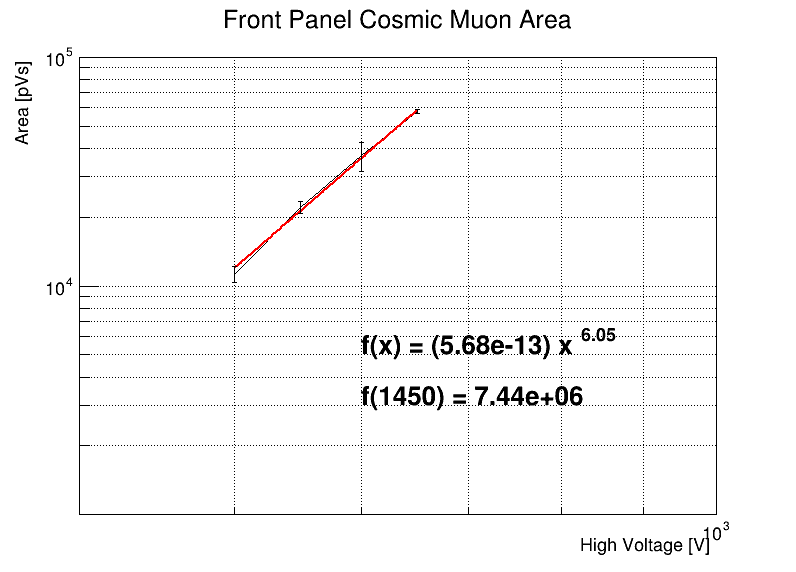

In [153]:
c1.Clear()
HV = [650, 600, 550, 500]
area = [mean650, mean600, mean550, mean500]
error = [err650, err600, err550, err500]

gBackPanelArea = r.TGraphErrors()

for i in range(len(HV)):
    gBackPanelArea.SetPoint(i, HV[i], area[i])
    gBackPanelArea.SetPointError(i, 0, error[i])

f = r.TF1('f', "[0]*x^[1]", 0, 1e3)
f.SetParameters(10, 10)
gBackPanelArea.Fit(f, "ME", "", 500, 650)

gBackPanelArea.SetTitle('Front Panel Cosmic Muon Area;High Voltage [V];Area [pVs]')
gBackPanelArea.Draw()
gBackPanelArea.GetXaxis().SetLimits(400, 1000)
gBackPanelArea.GetYaxis().SetRangeUser(1000, 100000)
c1.Draw()
c1.SetLogy()
c1.SetLogx()
c1.SetGrid()

par0 = f.GetParameter(0)
par1 = round(f.GetParameter(1), 2)

l1 = r.TLatex()
l1.DrawLatex(600, 5e3, f"f(x) = ({par0:.2e}) x^{{{par1}}}")

l2 = r.TLatex()
l2.DrawLatex(600, 3e3, f'f(1450) = {f.Eval(1450):.2e}')

In [143]:
r.gStyle.SetOptStat(0)

h800Back = hvRuns[800].Get('h_backPanelArea')
h800Back.SetLineColor(r.kCyan)
h750Back = hvRuns[750].Get('h_backPanelArea')
h750Back.SetLineColor(r.kOrange)
h700Back = hvRuns[700].Get('h_backPanelArea')
h700Back.SetLineColor(r.kMagenta)
h650Back = hvRuns[650].Get('h_backPanelArea')
h650Back.SetLineColor(r.kBlack)
h600Back = hvRuns[600].Get('h_backPanelArea')
h600Back.SetLineColor(r.kBlue)
h550Back = hvRuns[550].Get('h_backPanelArea')
h550Back.SetLineColor(r.kRed)
h500Back = hvRuns[500].Get('h_backPanelArea')
h500Back.SetLineColor(r.kGreen)

binning = 4
h800Back.Rebin(binning)
h750Back.Rebin(binning)
h700Back.Rebin(binning)
h650Back.Rebin(binning)
h600Back.Rebin(binning)
h550Back.Rebin(binning)
h500Back.Rebin(binning)

 FCN=3.07381 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=3.2495e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.41606e+00   1.74843e+00   1.79877e-03  -5.49081e-06
   2  Mean         7.78802e+04   1.24236e+03   1.54053e+00   2.25089e-09
   3  Sigma        6.32644e+03   1.01465e+03   5.61388e-05  -4.07936e-04
                               ERR DEF= 0.5
 FCN=4.46717 FROM MIGRAD    STATUS=CONVERGED      98 CALLS          99 TOTAL
                     EDM=5.7064e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.29591e+00   1.23663e+00   1.34904e-03   1.49975e-05
   2  Mean         5.16758e+04   4.00353e+03   4.23249e+00   4.7

Error in <TList::Clear>: A list is accessing an object (0xb341b20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb367840) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xae4f6d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xae4fb30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb33ffc0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb3721d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb372630) already deleted (list name = TList)
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale


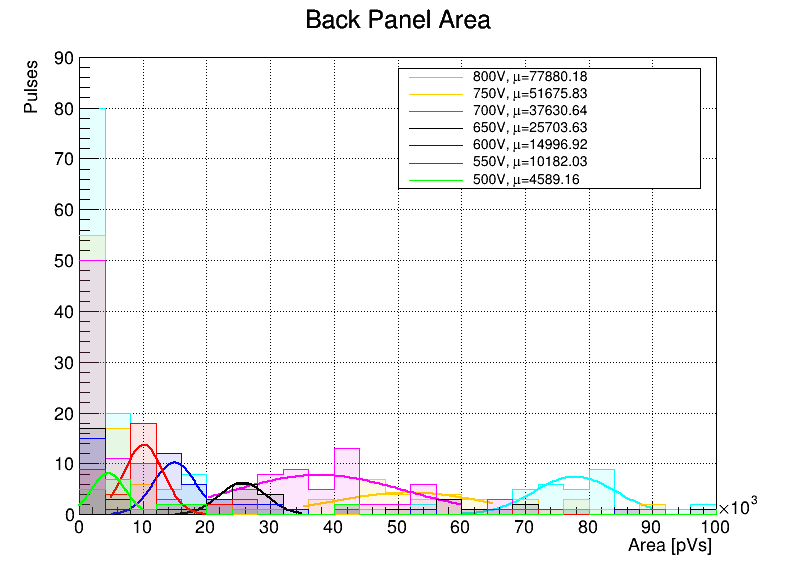

In [160]:
f800 = r.TF1('f800', 'gaus', 60e3, 90e3)
f750 = r.TF1('f750', 'gaus', 30e3, 70e3)
f700 = r.TF1('f700', 'gaus', 10e3, 70e3)
f650 = r.TF1('f650', 'gaus', 10e3, 40e3)
f600 = r.TF1('f600', 'gaus', 5e3, 30e3)
f550 = r.TF1('f550', 'gaus', 0, 30e3)
f500 = r.TF1('f500', 'gaus', 0, 20e3)

f800.SetLineColor(r.kCyan)
h800Back.SetFillColorAlpha(r.kCyan, 0.1)
f750.SetLineColor(r.kOrange)
h750Back.SetFillColorAlpha(r.kOrange, 0.1)
f700.SetLineColor(r.kMagenta)
h700Back.SetFillColorAlpha(r.kMagenta, 0.1)
f650.SetLineColor(r.kBlack)
h650Back.SetFillColorAlpha(r.kBlack, 0.1)
#f650.SetFillStyle(1)
f600.SetLineColor(r.kBlue)
h600Back.SetFillColorAlpha(r.kBlue, 0.1)
#f600.SetFillStyle(1)
f550.SetLineColor(r.kRed)
h550Back.SetFillColorAlpha(r.kRed, 0.1)
#f550.SetFillStyle(1)
f500.SetLineColor(r.kGreen)
h500Back.SetFillColorAlpha(r.kGreen, 0.1)
#f500.SetFillStyle(1)

h800Back.Fit(f800, "LL", "", 60e3, 90e3)
h750Back.Fit(f750, "LL", "", 35e3, 65e3)
h700Back.Fit(f700, "LL", "", 20e3, 60e3)
h650Back.Fit(f650, "LL", "", 15e3, 35e3)
h600Back.Fit(f600, "LL", "", 5e3, 20e3)
h550Back.Fit(f550, "LL", "", 5e3, 20e3)
h500Back.Fit(f500, "LL", "", 0e3, 10e3)

mean800 = round(f800.GetParameter(1), 2)
mean750 = round(f750.GetParameter(1), 2)
mean700 = round(f700.GetParameter(1), 2)
mean650 = round(f650.GetParameter(1), 2)
mean600 = round(f600.GetParameter(1), 2)
mean550 = round(f550.GetParameter(1), 2)
mean500 = round(f500.GetParameter(1), 2)

err800 = round(f800.GetParError(1), 2)
err750 = round(f750.GetParError(1), 2)
err700 = round(f700.GetParError(1), 2)
err650 = round(f650.GetParError(1), 2)
err600 = round(f600.GetParError(1), 2)
err550 = round(f550.GetParError(1), 2)
err500 = round(f500.GetParError(1), 2)

h800Back.GetXaxis().SetRangeUser(0, 100e3)
h800Back.GetYaxis().SetRangeUser(0, 90)
h800Back.SetTitle('Back Panel Area;Area [pVs];Pulses')
h800Back.Draw()
h750Back.Draw("same")
h700Back.Draw("same")
h650Back.Draw("same")
h600Back.Draw("same")
h550Back.Draw("same")
h500Back.Draw("same")
c1.Draw()
c1.SetLogy(0)
c1.SetLogx(0)

l1 = r.TLegend(0.7, 0.9, 0.7, 0.9)
l1.AddEntry(h800Back, f'800V, #mu={mean800}', 'l')
l1.AddEntry(h750Back, f'750V, #mu={mean750}', 'l')
l1.AddEntry(h700Back, f'700V, #mu={mean700}', 'l')
l1.AddEntry(h650Back, f'650V, #mu={mean650}', 'l')
l1.AddEntry(h600Back, f'600V, #mu={mean600}', 'l')
l1.AddEntry(h550Back, f'550V, #mu={mean550}', 'l')
l1.AddEntry(h500Back, f'500V, #mu={mean500}', 'l')
l1.Draw("same")

 FUNCTION MUST BE MINIMIZED BEFORE CALLING MINOs     
 FCN=4.65204 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS        2530 TOTAL
                     EDM=3.36879e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.51459e-12   5.86772e-12  -2.03958e-12  -2.05706e+01
   2  p1           5.53824e+00   1.36027e-01   1.36027e-01   2.24330e-02


Error in <TList::Clear>: A list is accessing an object (0xb341b20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb367840) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xae4f6d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xae4fb30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb33ffc0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb3721d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0xb372630) already deleted (list name = TList)


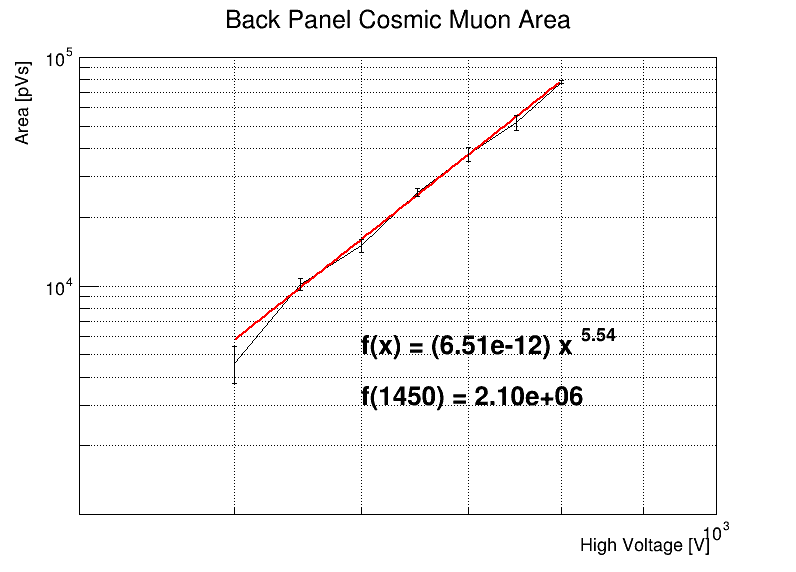

In [161]:
c1.Clear()
HV = [800, 750, 700, 650, 600, 550, 500]
area = [mean800, mean750, mean700, mean650, mean600, mean550, mean500]
error = [err800, err750, err700, err650, err600, err550, err500]

gBackPanelArea = r.TGraphErrors()

for i in range(len(HV)):
    gBackPanelArea.SetPoint(i, HV[i], area[i])
    gBackPanelArea.SetPointError(i, 0, error[i])

f = r.TF1('f', "[0]*x^[1]", 0, 1e3)
f.SetParameters(10, 10)
gBackPanelArea.Fit(f, "ME", "", 500, 800)

gBackPanelArea.SetTitle('Back Panel Cosmic Muon Area;High Voltage [V];Area [pVs]')
gBackPanelArea.Draw()
gBackPanelArea.GetXaxis().SetLimits(400, 1000)
gBackPanelArea.GetYaxis().SetRangeUser(1000, 100000)
c1.Draw()
c1.SetLogy()
c1.SetLogx()
c1.SetGrid()

par0 = f.GetParameter(0)
par1 = round(f.GetParameter(1), 2)

l1 = r.TLatex()
l1.DrawLatex(600, 5e3, f"f(x) = ({par0:.2e}) x^{{{par1}}}")

l2 = r.TLatex()
l2.DrawLatex(600, 3e3, f'f(1450) = {f.Eval(1450):.2e}')

Error in <TList::Clear>: A list is accessing an object (0xc588500) already deleted (list name = TList)


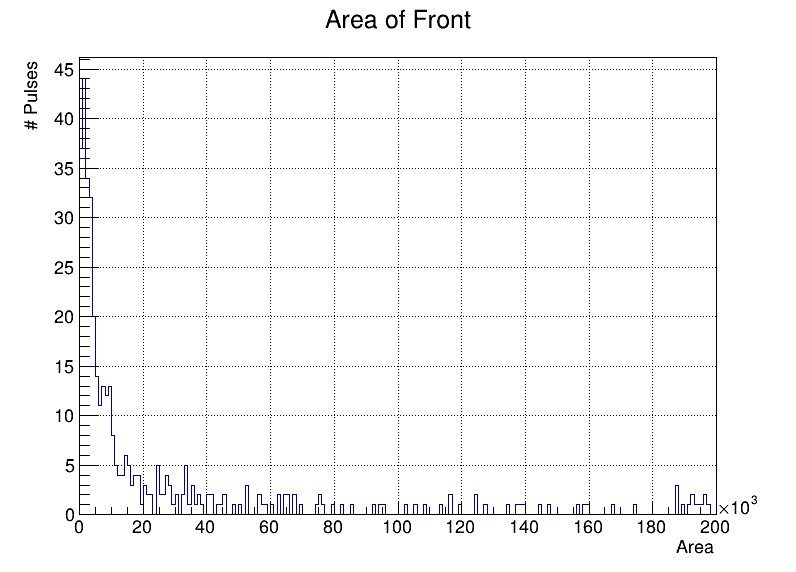

In [165]:
h900Front = hvRuns[900].Get('h_frontPanelArea')
h900Front.Draw()
h900Front.GetXaxis().SetRangeUser(0, 200e3)
c1.Draw()
c1.SetLogy(0)
c1.SetLogx(0)